### Тема “Обучение без учителя”

##### Задание 1
> 1. Импортируйте библиотеки pandas, numpy и matplotlib.
> 2. Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
> 3. Создайте датафреймы X и y из этих данных.
> 4. Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
> 5. Масштабируйте данные с помощью StandardScaler.
> 6. Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
> 7. Постройте диаграмму рассеяния на этих данных.


##### Импортируйте библиотеки pandas, numpy и matplotlib.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

In [2]:
from sklearn.datasets import load_boston

##### Создайте датафреймы X и y из этих данных.

In [3]:
ds = load_boston(); 

In [4]:
x = pd.DataFrame(ds.data, columns = ds.feature_names);
y = pd.DataFrame(ds.target, columns = ['target_price']);

##### Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [5]:
from sklearn.model_selection import train_test_split;
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42);

##### Масштабируйте данные с помощью StandardScaler.

* Для начала посмотрим на признаки и надо ли их маштабировать.

In [342]:
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.609125,11.569307,10.985050,0.071782,0.556484,6.315891,68.556436,3.808195,9.356436,404.032178,18.318317,356.278342,12.457351
std,8.875058,23.152481,6.894618,0.258447,0.117704,0.709452,27.994922,2.131226,8.589721,166.172655,2.228701,91.566533,7.110381
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.452000,5.890500,45.550000,2.087875,4.000000,279.000000,16.800000,375.472500,6.772500
50%,0.261390,0.000000,8.560000,0.000000,0.538000,6.210000,77.700000,3.175750,5.000000,330.000000,18.700000,391.305000,10.925000
75%,3.202962,20.000000,18.100000,0.000000,0.631000,6.636750,93.650000,5.400800,12.000000,666.000000,20.200000,395.755000,16.372500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


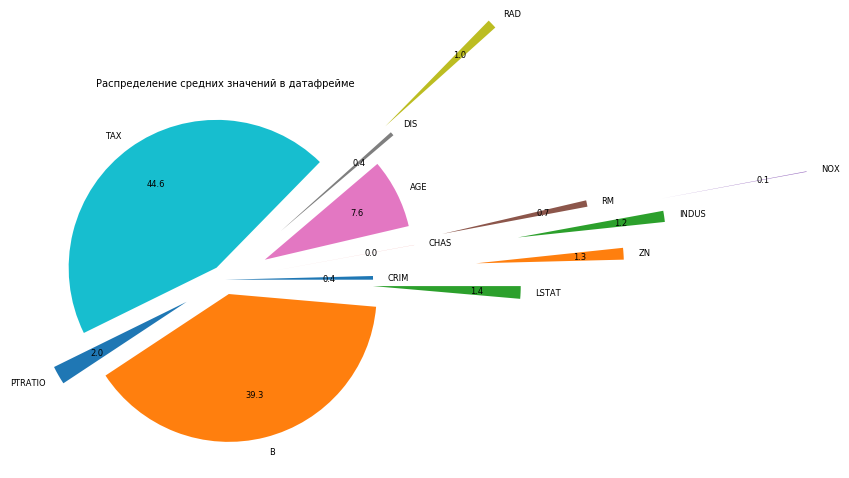

In [341]:

fig = plt.subplots();

plt.rcParams.update({'font.size': 6});

plt.title('Распределение средних значений в датафрейме');
plt.pie(X_train[X_train.columns.tolist()].mean(),
        autopct='%.1f', radius = 1, 
        wedgeprops = {'linewidth': 1}, 
        shadow = False,
        pctdistance = .7,
        labels = X_train.columns.tolist(),
        explode = (0, 1.7, 2, 0.3, 3, 1.5, 0.3, 0.5, 1.5, 0.1, 0.3, .1, 1)
       );
#plt.legend(loc = 'best', labels = X_train.columns.tolist());


* Как мы видим признаки имеют достаточно большой разброс и требуют маштабирование. 
* Например B и NOX.

In [35]:
from sklearn.preprocessing import StandardScaler

In [350]:
ss = StandardScaler()

X_train_scale = ss.fit_transform(X_train,y = None)
X_test_scale = ss.fit_transform(X_train,y = None)

X_train_scale = pd.DataFrame(X_train_scale, columns = ds.feature_names)
X_test_scale = pd.DataFrame(X_test_scale, columns = ds.feature_names)

##### Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42.

In [351]:
from sklearn.manifold import TSNE
model_tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

* Обучим нашу модель

In [360]:
X_train_scale_tsne = TSNE_model.fit_transform(X_train_scale);
X_test_scale_tsne = TSNE_model.fit_transform(X_test_scale);

##### Постройте диаграмму рассеяния на этих данных.

* Проверим что наши датасеты одинаковые

In [419]:
if X_train_scale_tsne.shape == X_test_scale_tsne.shape:
    print(True)
else:
    print(False)    

True


* Построение диаграммы

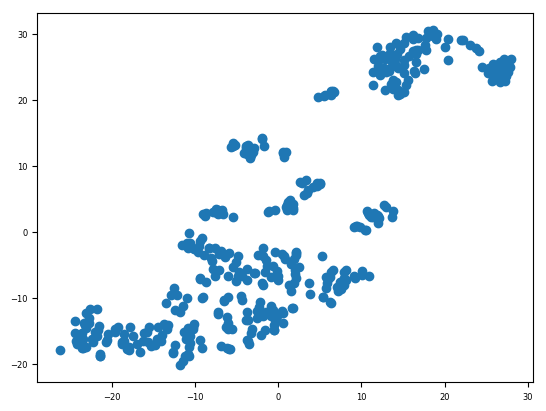

In [371]:
plt.scatter(X_train_scale_tsne[:,0],X_train_scale_tsne[:,1]);

### Задание 2
> 1. С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train. Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
> 2. Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.
> 3. Вычислите средние значения price и CRIM в разных кластерах.


##### С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.

In [415]:
# Импортируем модуль
from sklearn.cluster import KMeans

# Зададим разбиение на 3 кластера
km = KMeans(n_clusters = 3, max_iter = 100, random_state = 42)

##### Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


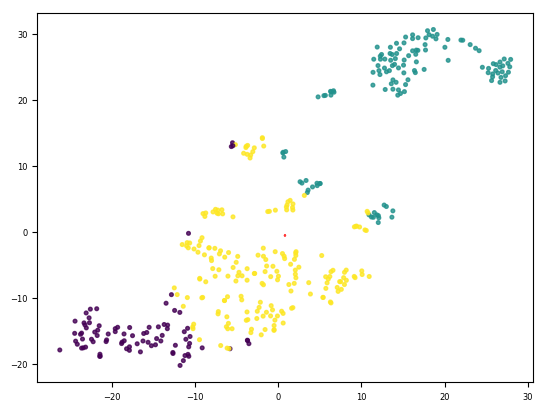

In [474]:
from sklearn.preprocessing import StandardScaler;
scaler = StandardScaler();

# Обучим модель
k_train = km.fit_predict(X_train_scale)
k_test = km.fit_predict(X_test_scale)

plt.scatter(X_train_scale_tsne[:,0],X_train_scale_tsne[:,1],c = k_train, alpha=0.8, s = 7 );

## Получим центры для кластеров
cl_centers = km.cluster_centers_
#scaler.inverse_transform(cl_centers)


plt.scatter(centers[:,0], centers[:,1], centers[:,2], marker=r'$\clubsuit$', color = 'red', alpha=0.7);


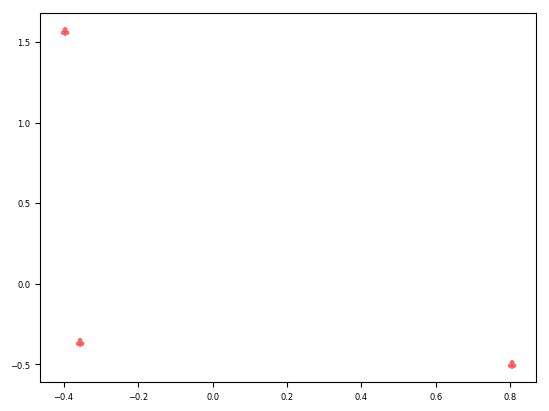

In [434]:


#scaler.inverse_transform(k_train)
#Найдем центры кластеров
#centers = scaler.inverse_transform(km.cluster_centers_)

#pd.value_counts(k_train)
#pd.value_counts(k_test)


